In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import plotly.express as px
import seaborn as sns

df = pd.read_csv("lightcast_job_postings.csv")
df.head()

In [ ]:
columns_to_drop = [
    "ID", "URL", "ACTIVE_URLS", "DUPLICATES", "LAST_UPDATED_TIMESTAMP",
    "NAICS_2022_2", "NAICS_2022_3", "NAICS_2022_4", "NAICS_2022_5",
    "SOC_2", "SOC_3", "SOC_5"
]
df.drop(columns=columns_to_drop, inplace=True)

In this case, the following columns are considered irrelevant or redundant: ID, used only for uniquely identifying data rows; URL and ACTIVE_URLS, which contain webpage links with no analytical significance; DUPLICATES, used for internal deduplication; and LAST_UPDATED_TIMESTAMP, which only records data update times. Additionally, NAICS2 - NAICS6 include excessive industry classification codes that may cause redundancy, while SOC_2, SOC_3, and SOC_5 are detailed occupational classifications that do not impact the final analysis.
As multiple versions of NAICS/SOC codes, it is important to remove several of them. Since different versions provide similar information but may include duplicates or slight variations, leading to data bloat. Besides, if we do not cancel them, it is possible that we use two different version to analysis. This may cause problem in deeper analysis.
In order to improve the accuracy of analysis, we first deleted irrelevant columns to reduce irrelevant data and improve the efficiency of data cleaning.
Then remove duplicate data to ensure that each recruitment information is unique to prevent data duplication. Replace categorical variables (such as Industry) with "Unknown" to maintain data integrity.


In [ ]:
msno.heatmap(df)
plt.title("Missing Values Heatmap")
plt.show()

df.dropna(thresh=len(df) * 0.5, axis=1, inplace=True)

numerical_columns = df.select_dtypes(include=['number']).columns
for col in numerical_columns:
    df[col].fillna(df[col].median(), inplace=True)
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    df[col].fillna("Unknown", inplace=True)

print(list(df.columns))

In order to analyze the employment market trends more intuitively, we use the following visualization methods: The bar chart can show the number of recruitments in each industry, and directly show some industries with the highest recruitment demand.The box plot can show the salary distribution of each industry. This chart can show the median and extreme values ​​of salaries in different industries.
The pie chart shows the proportion of remote or offline work.
The line chart can show the trend more clearly and is used to observe whether AI-related positions are actually growing faster.


In [ ]:
top_20_industries = df["NAICS2_NAME"].value_counts().nlargest(20)

plt.figure(figsize=(10, 6))
top_20_industries.plot(kind="bar", color="steelblue")
plt.title("Job Postings by Industry")
plt.xlabel("Industry")
plt.ylabel("Job Postings")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

Bar Chart: Job Postings by Industry
Key Findings
	1.- The chart shows that “Professional, Scientific, and Technical Services” has a much higher number of job postings than any other industry, more than double the number of the second industry. This indicates that specialized skills such as technology, engineering, data science, and consulting are in high demand.
	2. Higher demand for hiring in Finance and Insurance and Manufacturing indicates a growth in demand for skilled professionals in these sectors.
	3. Retail, Arts, Accommodation and Food Services have significantly lower hiring demand, reflecting the fact that these industries may be affected by automation, the economic climate and the development of AI.
	4. Higher hiring in Unclassified Industries, which may include emerging industries or cross-cutting positions such as AI R&D and freelancing, suggests that the labor market is undergoing structural change.
Key insights
Job seekers can focus more on high-demand industries, especially in technology, finance and manufacturing.
AI and data-related careers are in high demand, and upgrading skills such as Python, SQL, and machine learning will increase competitiveness.
Candidates in low-demand sectors can transition into cross-industry roles, such as tech-related roles or upgrading cross-industry skills.


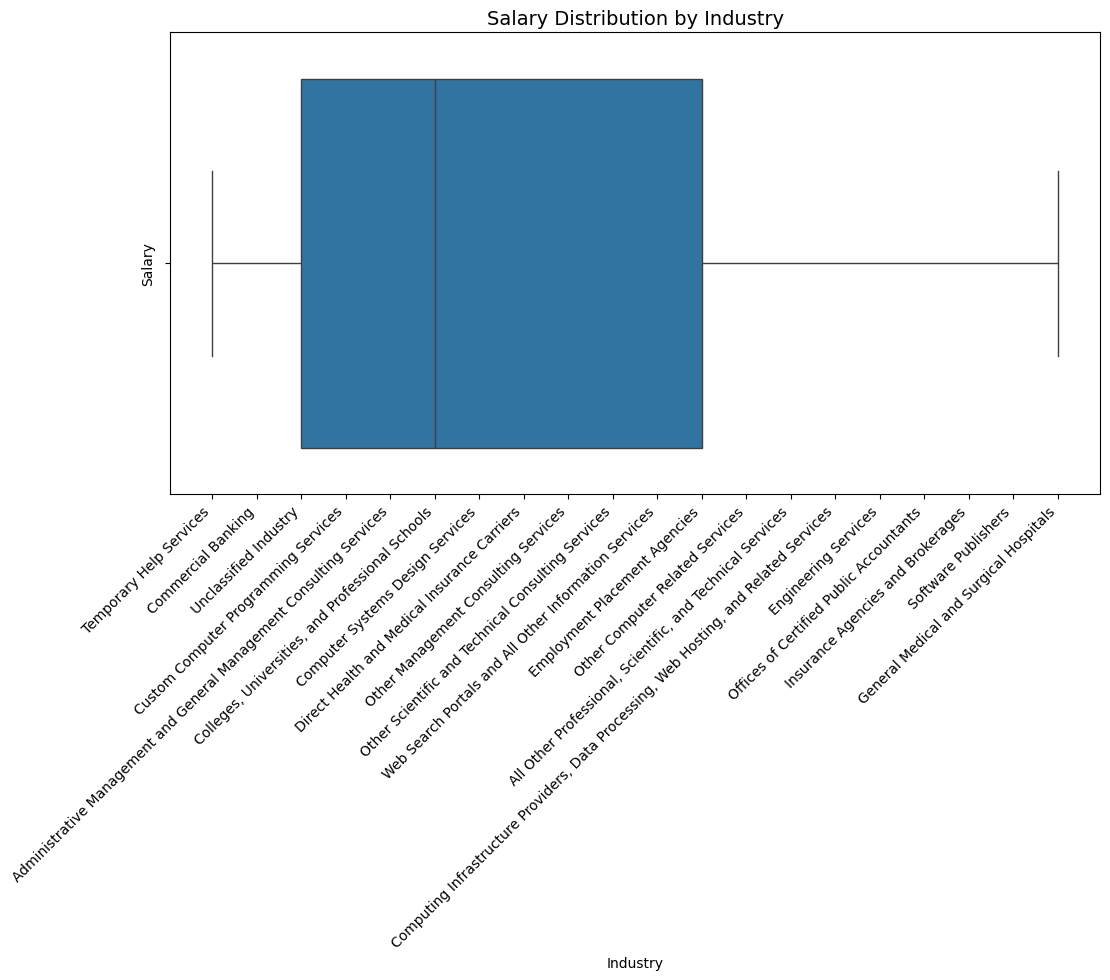

In [ ]:
top_20_industries = df["NAICS_2022_6_NAME"].value_counts().nlargest(20)
df_filtered = df[df["NAICS_2022_6_NAME"].isin(top_20_industries.index)]

salary_columns = ["Salary", "WAGE", "COMPENSATION", "HOURLY_RATE"]
salary_col = next((col for col in df.columns if col in salary_columns), None)


plt.figure(figsize=(12, 6))
sns.boxplot(data=df_filtered, x="NAICS_2022_6_NAME", y=salary_col)

plt.title("Salary Distribution by Industry", fontsize=14)
plt.xticks(rotation=45, ha="right")
plt.xlabel("Industry")
plt.ylabel("Salary")

plt.show()

Boxplot: Salary Distribution by Industry
Key Findings
        1. The box plot shows a wide distribution of median salaries by industry, which suggests that there may be large salary gaps between industries.
        2. Certain industries have narrower salary distributions, such as General Medical and Surgical Hospitals and Insurance Agencies and Brokerages, suggesting that salaries in these industries are relatively stable and may have standardized salary structures.
        3. The impact of outliers touching the far ends of the box plot suggests that extreme high salaries in certain industries (e.g., executive positions, hot tech jobs) can significantly drive up average salaries.
Key insights
For job seekers looking for higher salaries, focus on industries with wider salary distributions and higher upper quartiles.
For job seekers looking for a stable salary, healthcare and education industries offer less salary variability and are ideal for long-term career planning.
Industry choice is critical to salary growth, and job seekers can choose a career path that suits them based on salary distribution and their own skills.


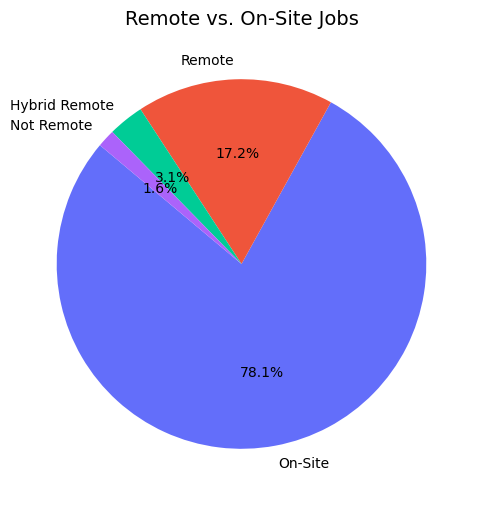

In [ ]:
df["REMOTE_TYPE_NAME"] = df["REMOTE_TYPE_NAME"].replace({None: "On-Site", "[None]": "On-Site"})

remote_counts = df["REMOTE_TYPE_NAME"].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(remote_counts, labels=remote_counts.index, autopct='%1.1f%%', startangle=140, colors=['#636EFA', '#EF553B', '#00CC96', '#AB63FA'])

plt.title("Remote vs. On-Site Jobs", fontsize=14)

plt.show()

Pie Chart: Remote vs. On-Site Jobs
Key Findings
	1. 78.3% of jobs are on-site, indicating that despite the growth of remote jobs, most companies still prefer employees to work in the office.
	2. Remote jobs make up 17% of the workforce, indicating that the trend toward telecommuting continues to grow.
         3. The growth of the Hybrid Remote model, with 3.11% of positions being Hybrid Remote, suggests that some companies are adopting a part remote, part on-site work model to increase employee flexibility and productivity.
	4. Not Remote may mean that some positions are explicitly not telecommuting.
key insights
Hybrid office models are growing, and job seekers can choose flexible work arrangements, such as looking for partially remote positions, to improve life-work balance.
On-site work is still the mainstream, and job seekers need to consider industry characteristics and their own needs.


In [ ]:
print("Data Cleaning and EDA completed successfully")
df.head()